# Advanced Spatial Methods

From the previous chapters we have learned various methods for both vector and raster analysis. In this chapter, we look into two more methods that takes in a vector (mostly points) and generates a raster (surface). Before delving into the methods we have to first look at a key theoretical construct called **spatial autocorrelation**.

## Spatial Autocorrelation

### What is Spatial Autocorrelation?

>"**Data from locations near one another in space** are more likely to be **similar than data from locations remote from one another**."

Another simple definition:

>"Degree to which **similar values are located in similar locations**."

And for the statistically inclined folks

>Spatial autocorrelation implies a **nonzero covariance between the values on a random variable for neighboring locations**:


$$Cov(y_i,y_j) = E(y_iy_j)-E(y_i)E(y_j)\neq{0}\text{ for i} \neq{j}$$
where the *i,j* locations have a spatial interpretation.

***If spatial autocorrelation were not commonplace, geographic analysis would be of little interest, and geographic analysis would be of little interest and geography would be irrelevant.*** 

Many geographical phenomenon can be characterized in these terms

<ul><li><b>Cities are local concentration of populations</b></li>
<li><b>Storms are local foci of particular atmospheric conditions</b></li>
<li><b>Climate: Repeated occurrences of similar spatial pattern of weather in particular places.</b></li>
<li><b>In the case of temperature, points close to a heat source will have a higher temperature that those far from it or closer to a cold spot.</b></li> 
<li><b>If we study the distribution of an infectious disease, reported cases are likely to appear grouped and a large number of them normally cause the nearby populations to also be significantly affected by the disease.</b></li> 
</ul>

Below is an example of the vegetation cover in US. With spatial autocorrelation you can clearly see nearby places have similar values while without spatial autocorrelation everything would look random. 

![admethod1](images/admethod1.png)

Now lets take another interesting example of two hypothetical regions A and B where people speak French and German respectively. Now if there was no spatial autocorrelation then people everywhere within the same state irrespective of whether they are living near to border or not will speak the same language. But with spatial autocorrelation people living in the border areas would have a cultural influence of the other region and hence might know both the languages (again this is not mandatory, but there is a higher chance).

![admethod2](images/admethod2.png)

Another way of expressing Spatial Autocorrelation is know as **Tobler's First Law of Geography**

So what's **First Law of Geography**

>**Everything is related to everything else, but near things are more related than distant things**.


### Types of Spatial Autocorrelation

#### Positive Spatial Autocorrelation

Positive autocorrelation is by far the most commonly observed case and refers to situations where **nearby observations are likely to be similar to one another**. For eg. Neighboring countries have similar economic policies or neighboring voters favor the same candidate. Other examples include income, poverty, vegetation, and Temperature.

#### Negative Spatial Autocorrelation

Negative spatial autocorrelation exists when neighboring units may have dissimilar values on the variable. Eg. Crime moves from one precinct to a neighboring precinct. Eg: supermarkets, police stations, fire stations, and hospitals.

#### Zero Spatial Autocorrelation

Zero autocorrelation is the case where no spatial effect is discernable, and observations seem to vary randomly through space. 

![admethod3](images/admethod3.png)

### Implication of Spatial Autocorrelation

<ul> <li> Most of the statistical approaches often assume that the <b>measured outcomes are independent of each other.</b> </li>
<li>In statistics a collection of random variables is <b>independent and identically distributed (i.i.d)</b> if each random variable has the <b>same probability distribution</b> as the others and are <b>mutually independent</b></li>.
<li> Spatial data exhibiting <b>spatial autocorrelation violates i.i.d</b></li>
<li>If positive correlation exists, <b>statistical inference is less effective</b>. The <b>same number of observations contain less information about the phenomena represented by the variable</b>.
<li><b>Detection and quantification</b> of Spatial autocorrelation is important in identifying <b>clusters</b> as well as in <b>predictive analysis (includes interpolation)</b></li>
<li> <b>Spatial weighting schemes</b> are required to incorporate the <b>effect of spatial autocorrelation</b> on statistical methods (which we are covering on the next chapter). </li>
</ul>

Armed with the knowledge of Spatial Autocorrelation let's look at our first Advanced Method

## Kernel Density Estimate (KDE)

![adv1](images/adv1.jpg)

.......have yo seen such maps??

In simple terms **Density mapping is simply a way to show where points or lines may be concentrated in a given area**.

Let's look at how density is calculated. 

### How Kernel Density is Estimated

KDE allows one to **estimate the intensity of a point pattern and to represent it by means of a smoothed three-dimensional continuous surface that represents the variation of density of point events across the study region**. The procedure can be organized in three steps

1. A **fine Grid is placed over the study region and the distribution of events**. 

2. A moving three-dimensional function visits each cell and calculates weights for each point within the function's radius (threshold or bandwidth). In most of the kernel functions considered, **events closer to the center are given a higher weight than those located at the edge of the search function, therefore contributing more to the reference cell's density value.**

3. Grid cell values are calculated by **summing the values of all surfaces for each location**.


![admethod4](images/admethod4.png)

4. For those who are interested in knowing about the equation behind it 

![admethod5](images/admethod5.png)

where i = 1..n are the total input points. We will use only points that fall within the radius distance. 

pop<sub>i</sub> is the population field value of point (event). By default this is one. But you can weight this by other values too. For example if an event point indicates the number of people died, we can use that number as the weight or pop<sub>i</sub>. And dist<sub>i</sub> is the distance between point i and the (x,y) location.

So as you can see as the distance between the input point and the event point increases, *dist<sub>i</sub> / radius* tends to 1 and hence the influence reduce to 0. So the distance decay effect is incorporated here.


### Advantages of KDE

1. It allows estimation of the density at any location in the study region while preserving the total number of events.

2. Generates a smooth 3 dimensional continuous surface in which peaks represent the presence of clusters or ‘hot spots’ in the distribution of events.

3. Different bandwidths allow analysis of the phenomena at different scales, as a **wider bandwidth visualizes a more general trend over the study region and smoothing of the spatial variation of the phenomenon, while a narrower bandwidth highlights more local effects such as ‘peaks and valleys’ in the distribution**.

4. The **choice of the bandwidth depends also on the size of the sample points, as sparser events generally are better evaluated using a larger bandwidth, since a narrower one will not provide much more information than the simple observation of event distribution in a dot-map or scatter plot**.

Now let's get our hands dirty. We will use NYPD shooting data (Crime analysis is a major area where KDE is heavily used)

### KDE in Action

1. Download the NYPD shooting data for 2020 from https://cwru.box.com/s/kbolqh18qg47fwxnvn4y4ucnvmohp54f

2. Load the CSV file to QGIS

![admethod6](images/admethod6.png)

3. Open the Tool box and select Interpolation and select Heatmap

![admethod7](images/admethod7.png)

4. Check various Heatmap Parameters. If you are seeing radius in Degrees with an exclamation then you might need to re-project the dataset to a projected coordinate system with units in meters. So let's re-project the layer first. Steps for re-projecting

Select Reproject Layer from Vector General in Toolbox

![admethod8](images/admethod8.png)

Select NYPD layer as the input layer and select EPSG 3857 as the Target CRS

![admethod9](images/admethod9.png)

Click on run and a new layer named "Reprojected" will be created.

Now from Toolbox select Interpolation and select Heatmap

5. Change the heatparameters and use the Reprojected Layer as the Point layer. Now you should see meters as the unit for radius. Select an appropriate radius. For this experiment we will select as 1km and pixel size as 100m (both X and Y)

![admethod10](images/admethod10.png)

6. Click Run and you will see a grayscale raster image. Since this is a raster, you can use symbology to make it more visually pleasing. For example, I have used the reds color ramp here

![admethod11](images/admethod11.png)

7. Now to gain more context you can add a reference map and then reduce the transparency of the KDE map. 

![admethod12](images/admethod12.png)

What if we change the radius from 1km to 10km. You should try it out. As previously pointed out, bandwidth aka radius has a greater influence on the result on your KDE results. Higher the bandwidth the more smoother the pattern will be, but then you might loose some important hotspots. Generally the bandwidth is calculated based on knowledge about the underlying phenomenon under investigation.

Now we will look into how we can use Spatial Autocorrelation to predict the value at an unknown location based on values at known location (Spatial Interpolation)


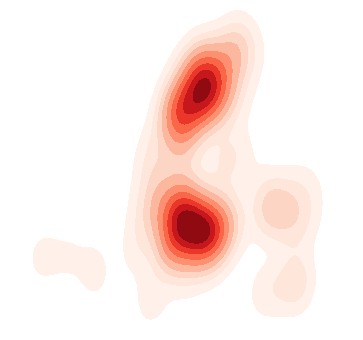

In [7]:
import geopandas as gpd
import geoplot
import numpy as np
import pandas as pd
data = pd.read_csv(r'C:/Users/jxa421/sharedData/NYPD_Shooting_Incident_Data_2020.csv')
dataGeo = gpd.GeoDataFrame(data,geometry = gpd.points_from_xy(data.Longitude,data.Latitude),crs='EPSG:4326')
#data = gpd.read_file()
geoplot.kdeplot(dataGeo,cmap='Reds',shade=True,projection=gcrs.WebMercator());
#print(data.geometry)

## Spatial Interpolation

Given a distribution of point meteorological stations showing precipitation values, how I can I estimate the precipitation values where data were not observed.

For example in the figure shown below the star symbols, represent meteorological stations (all of them having precipitation recorded). Now how will we find the precipitation value in the locations that are marked as "X".

![admethod13](images/admethod13.png)

Now previously we have learned that raster datasets are ideal for such queries as they always represent continuous surface. So how do we create such a surface from the set of locations and values? 

This is exactly what spatial interpolation does.

### Types of spatial Interpolation

#### Proximity Interpolation

This is probably the **simplest (and possibly one of the oldest) interpolation method**. The process is simple, **assign all un-sampled locations the value of the closest sampled location**. 

**This generates a tessellated surface whereby lines that split the midpoint between each sampled location are connected thus enclosing an area. This is called Voronoi Polygon or Thiessen Polygon. Each area ends up enclosing a sample point whose value it inherits.**

**One problem with this approach is that the surface values change abruptly across the tessellated boundaries. This is not representative of most surfaces in nature.**

Even though we won't be covering this interpolation algorithm in detail, let's try it out for fun. For this experiment, we will be using snow depth data from Utah

1. Download the data from https://cwru.box.com/s/nn4lr5y3fsnth17lgwrlm0qv1kefw50h

2. Load the data to QGIS

![admethod14](images/admethod14.png)

3. Select Vector Geometry from toolbox and select Voronoi Polygons

![admethod15](images/admethod15.png)


4. Now select input layer as the snow depth data and click run. 

![admethod16](images/admethod16.png)

5. You will get a set of Polygons as output. If you examine the Attribute table, each of them will have all the attributes as the snow depth data.

![admethod17](images/admethod17.png)

For proximity interpolation, if you want to check the value for a new location, you find the polygon in which it resides and then assign the value for the new location as the value assignd to the polygon.

This method does not create a smooth surface of values, but rather create polygons, which might have abrupt changes in value. Now let us try an interpolation method that generates smooth surface based on bandwidth.

#### Inverse Distance Weighted Interpolation (IDW)

**The IDW technique computes an average value for un-sampled locations using values from nearby weighted locations**. The **weights are proportional to the proximity of the sampled points to the un-sampled location and can be specified by the IDW power coefficient**. The larger the power coefficient, the stronger the weight of nearby points. 

The formula for IDW is given by 

![admethod18](images/admethod18.png)

Where <b>z<sub>p</sub></b> is the unknown value to be estimated at a new position. i from 1 to n represents the neighbors for the location. <b>z<sub>i</sub></b> is the value at the <b>i</b>th neighbor of the new location. <b>d<sub>i</sub><sup>p</sup></b> is the distance of the new location from the <b>i th</b> location raised to a power <b>p</b>. Generally we take <b>p</b> as 2. As the power increases the influence by local nearby values increases. 

Let's try IDW using the same snow depth dataset for Utah

##### IDW in action

1. Load the snow depth dataset to QGIS

2. Open IDW interpolation from Tool box Interpolation

3. Select Vector Layer as snow depth, Interpolation attribute as Amount and click on the + symbol. Click on the drop down extent and select calculate from layer and again select snow depth and then click run

![admethod19](images/admethod19.png)

4. A new interpolated raster dataset will be generated which we can further be styled. 

![admethod20](images/admethod20.png)


So now you have learned to generate surface from point level data sources. In the next chapter we look at Spatial data Privacy and Confidentiality, which you should be aware of while handling spatial health data. 